In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import anova_lm 
from scipy.stats import zscore
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

## 1. Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

### Basic data Exploration.

In [22]:
df2= pd.read_csv('Education+-+Post+12th+Standard.csv')
df2.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [23]:
df2.tail()

Names   Apps  Accept  Enroll  Top10perc  \
772         Worcester State College   2197    1515     543          4   
773               Xavier University   1959    1805     695         24   
774  Xavier University of Louisiana   2097    1915     695         34   
775                 Yale University  10705    2453    1317         95   
776    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99

In [24]:
df2.shape

(777, 18)

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [26]:
df2.dtypes.value_counts()

int64      16
object      1
float64     1
dtype: int64

In [27]:
df2.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

### Checking for missing value.

In [28]:
df2.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

### Checking for duplicates.

In [29]:
df2.duplicated().sum()

0

### Univariate Analysis.

In [30]:
df2.skew()

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

In [31]:
col=df2.columns
col

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

### Calculating Coefficient of variance to check dispersion

In [32]:
for i in range(1,18):
    print('CV for {} ='.format(col[i]), round(df2[col[i]].std()*100/df2[col[i]].mean(),2))

CV for Apps = 128.94
CV for Accept = 121.41
CV for Enroll = 119.13
CV for Top10perc = 64.01
CV for Top25perc = 35.49
CV for F.Undergrad = 131.1
CV for P.Undergrad = 178.0
CV for Outstate = 38.53
CV for Room.Board = 25.17
CV for Books = 30.05
CV for Personal = 50.5
CV for PhD = 22.47
CV for Terminal = 18.47
CV for S.F.Ratio = 28.09
CV for perc.alumni = 54.48
CV for Expend = 54.05
CV for Grad.Rate = 26.24


## Analysis for 'Applications' category.

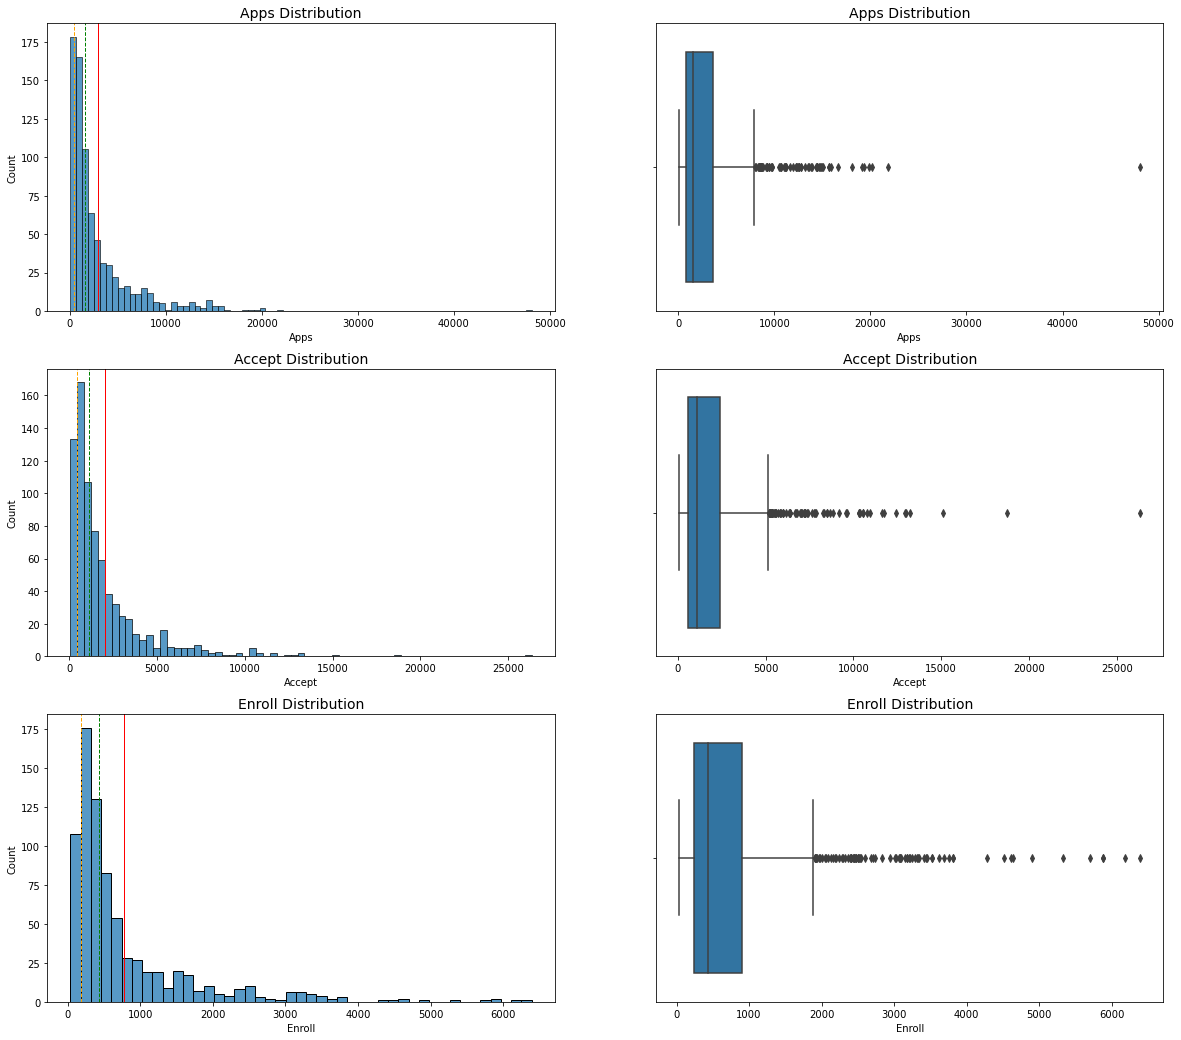

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,18))

for i in range(1,4):
    plot = sns.histplot(df2[col[i]], ax = axes[i-1][0]);
    plot.set_title('{} Distribution'.format(col[i]), fontsize=14);
    plot.axvline(df2[col[i]].mean(), color='r',linewidth=1)
    plot.axvline(df2[col[i]].median(), color='g',linestyle='dashed',linewidth=1)
    plot.axvline(df2[col[i]].mode()[0], color='Orange',linestyle='dashed',linewidth=1)
    
    plot= sns.boxplot(df2[col[i]], orient='v', ax= axes[i-1][1]);
    plot.set_title('{} Distribution'.format(col[i]), fontsize=14);
    
    

## Analysis for 'Top 10% & 25% Enrolments' Category.

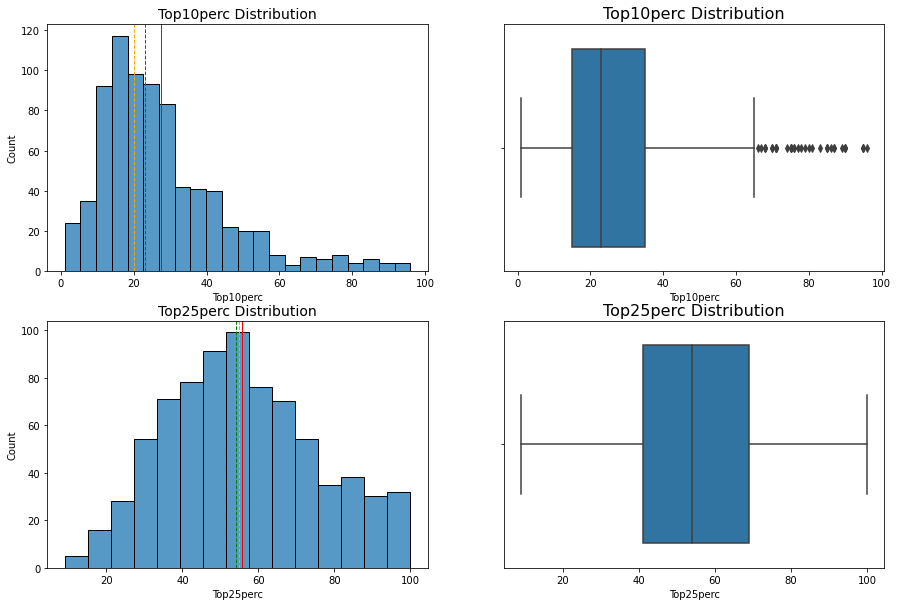

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for i in range(4,6):
    plot = sns.histplot(df2[col[i]], ax = axes[i-4][0]);
    plot.set_title('{} Distribution'.format(col[i]), fontsize=14);
    plot.axvline(df2[col[i]].mean(), color='r',linewidth=1)
    plot.axvline(df2[col[i]].median(), color='g',linestyle='dashed',linewidth=1)
    plot.axvline(df2[col[i]].mode()[0], color='Orange',linestyle='dashed',linewidth=1)
    
    plot= sns.boxplot(df2[col[i]], orient='v', ax= axes[i-4][1]);
    plot.set_title('{} Distribution'.format(col[i]), fontsize=16);

## Analysis of 'student types' category.

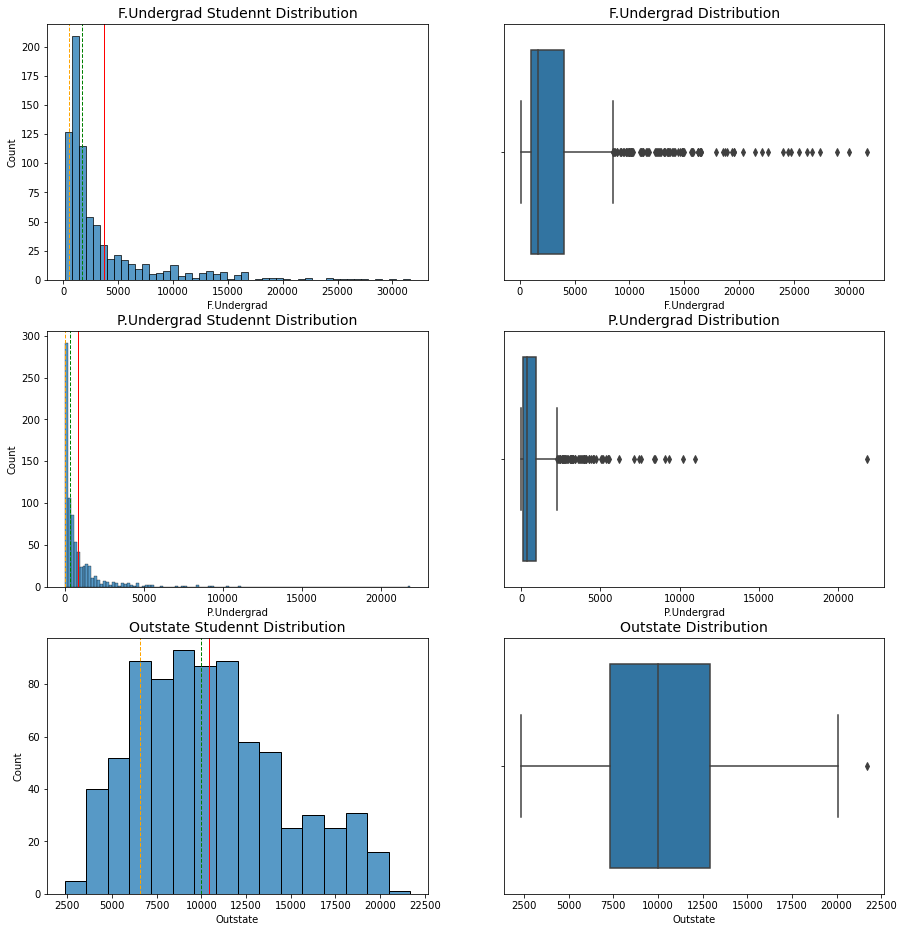

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,16))

for i in range(6,9):
    plot = sns.histplot(df2[col[i]], ax = axes[i-6][0]);
    plot.set_title('{} Studennt Distribution'.format(col[i]), fontsize=14);
    plot.axvline(df2[col[i]].mean(), color='r',linewidth=1)
    plot.axvline(df2[col[i]].median(), color='g',linestyle='dashed',linewidth=1)
    plot.axvline(df2[col[i]].mode()[0], color='Orange',linestyle='dashed',linewidth=1)
    
    plot= sns.boxplot(df2[col[i]], orient='v', ax= axes[i-6][1]);
    plot.set_title('{} Distribution'.format(col[i]), fontsize=14);

## Analysis of 'expenditure' type category.

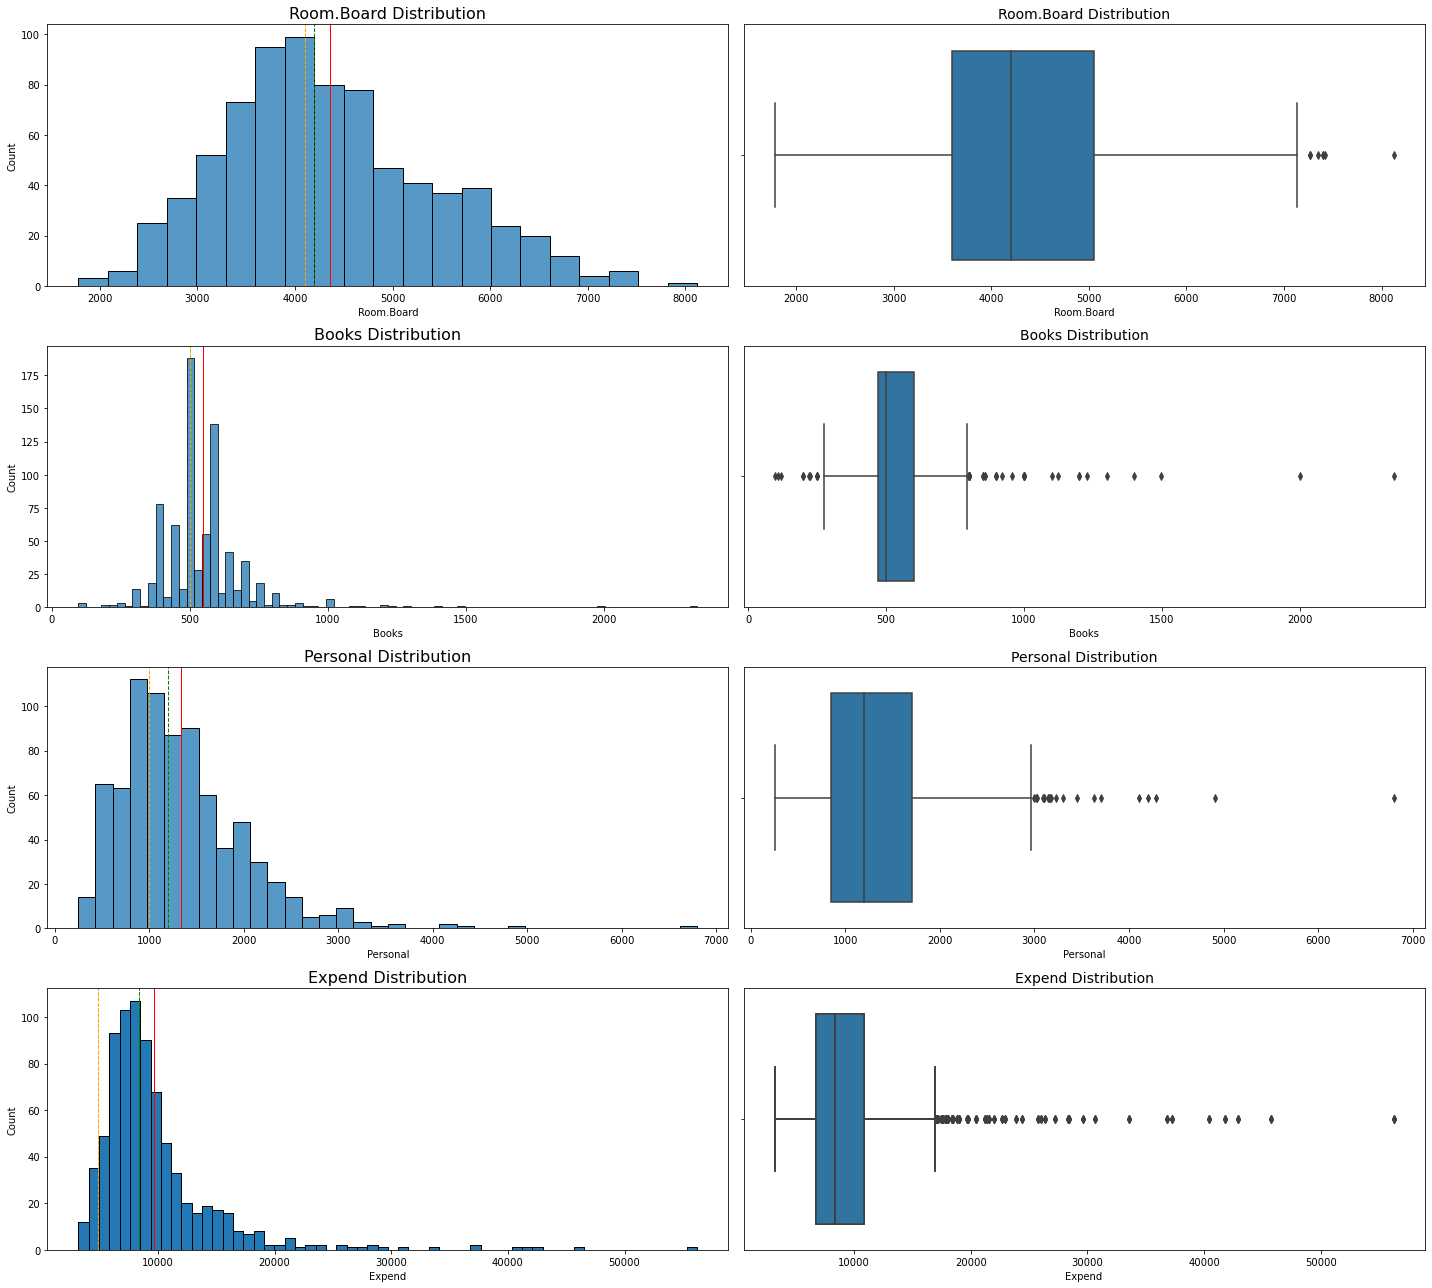

In [36]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,18))

for i in range(9,12):
    plot = sns.histplot(df2[col[i]], ax = axes[i-9][0]);
    plot.set_title('{} Distribution'.format(col[i]), fontsize=16);
    plot.axvline(df2[col[i]].mean(), color='r',linewidth=1)
    plot.axvline(df2[col[i]].median(), color='g',linestyle='dashed',linewidth=1)
    plot.axvline(df2[col[i]].mode()[0], color='Orange',linestyle='dashed',linewidth=1)
    
    plot= sns.boxplot(df2[col[i]], orient="v", ax= axes[i-9][1]);
    plot.set_title('{} Distribution'.format(col[i]), fontsize=14);
    
    plot = sns.histplot(df2[col[16]], ax = axes[3][0]);
    plot.set_title('{} Distribution'.format(col[16]), fontsize=16);
    plot.axvline(df2[col[16]].mean(), color='r',linewidth=1)
    plot.axvline(df2[col[16]].median(), color='g',linestyle='dashed',linewidth=1)
    plot.axvline(df2[col[16]].mode()[0], color='Orange',linestyle='dashed',linewidth=1)
    
    plot= sns.boxplot(df2[col[16]], orient="v", ax= axes[3][1]);
    plot.set_title('{} Distribution'.format(col[16]), fontsize=14);
    
    plt.tight_layout()

## Analysis of '% of faculty & student/faculty ratio'.

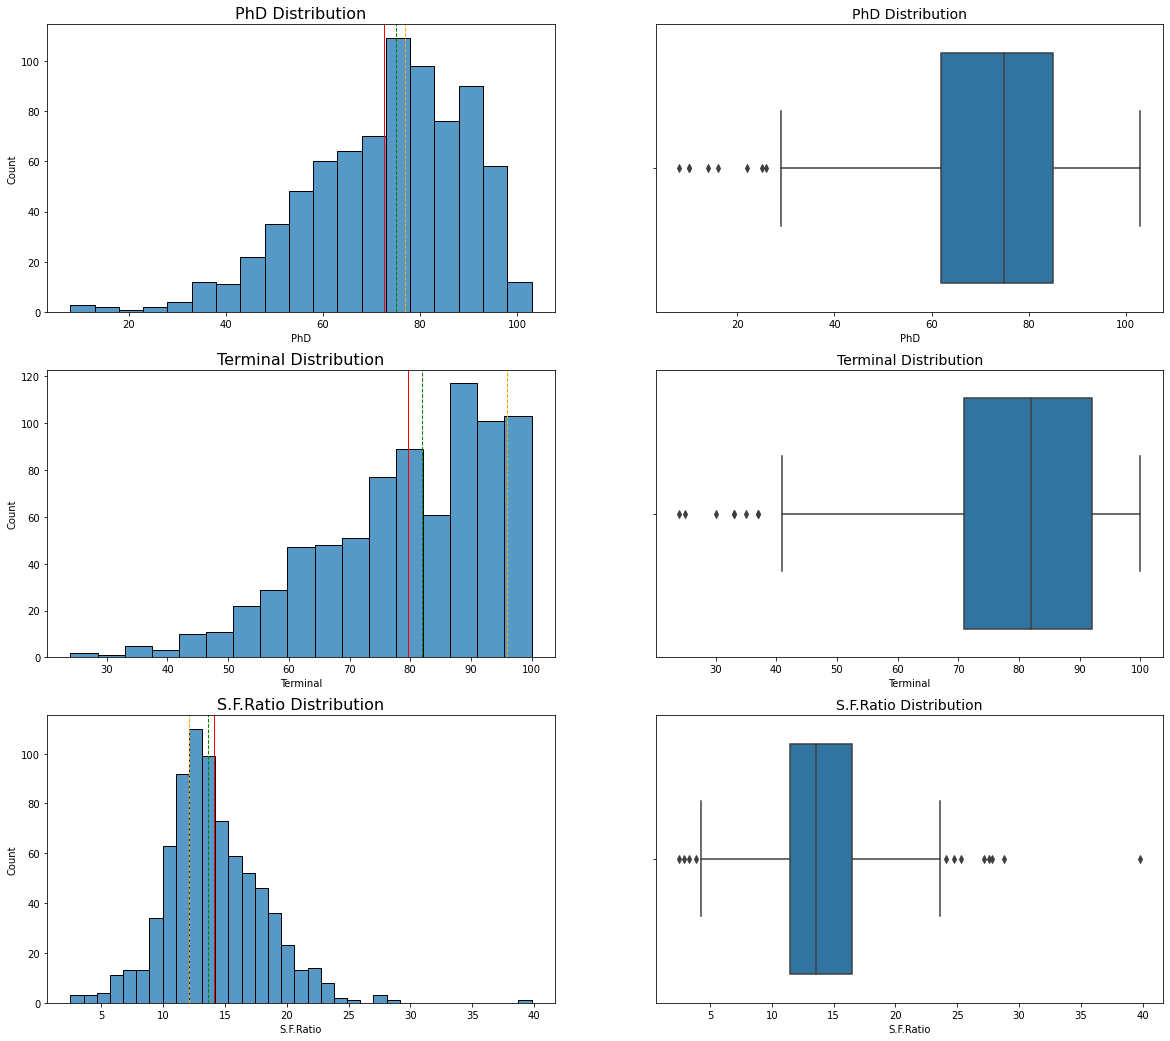

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,18))

for i in range(12,15):
    plot = sns.histplot(df2[col[i]], ax = axes[i-12][0]);
    plot.set_title('{} Distribution'.format(col[i]), fontsize=16);
    plot.axvline(df2[col[i]].mean(), color='r',linewidth=1)
    plot.axvline(df2[col[i]].median(), color='g',linestyle='dashed',linewidth=1)
    plot.axvline(df2[col[i]].mode()[0], color='Orange',linestyle='dashed',linewidth=1)
    
    plot= sns.boxplot(df2[col[i]], orient="v", ax= axes[i-12][1]);
    plot.set_title('{} Distribution'.format(col[i]), fontsize=14);

## Analysis of '% of Alumni who Donated and Grad Rate'

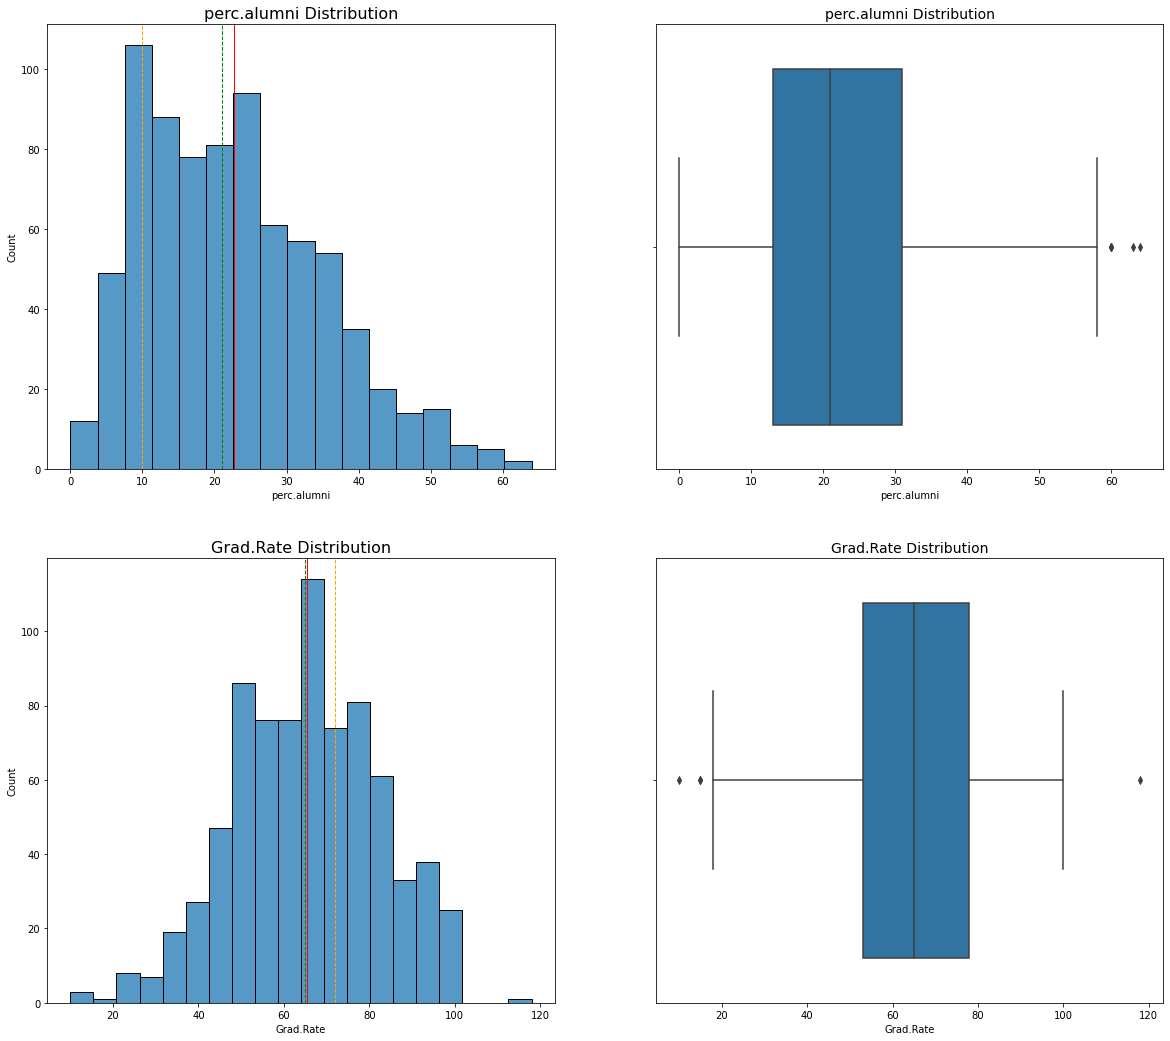

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,18))

plot = sns.histplot(df2[col[15]], ax = axes[0][0]);
plot.set_title('{} Distribution'.format(col[15]), fontsize=16);
plot.axvline(df2[col[15]].mean(), color='r',linewidth=1)
plot.axvline(df2[col[15]].median(), color='g',linestyle='dashed',linewidth=1)
plot.axvline(df2[col[15]].mode()[0], color='Orange',linestyle='dashed',linewidth=1)
    
plot= sns.boxplot(df2[col[15]], orient="v", ax= axes[0][1]);
plot.set_title('{} Distribution'.format(col[15]), fontsize=14);

plot = sns.histplot(df2[col[17]], ax = axes[1][0]);
plot.set_title('{} Distribution'.format(col[17]), fontsize=16);
plot.axvline(df2[col[17]].mean(), color='r',linewidth=1)
plot.axvline(df2[col[17]].median(), color='g',linestyle='dashed',linewidth=1)
plot.axvline(df2[col[17]].mode()[0], color='Orange',linestyle='dashed',linewidth=1)
    
plot= sns.boxplot(df2[col[17]], orient="v", ax= axes[1][1]);
plot.set_title('{} Distribution'.format(col[17]), fontsize=14);
    

## Multivariate Anaysis.

* Here we drop the 'Names'column which is it of categorical dtype.


In [39]:
df3=df2.drop('Names',axis=1)
df3.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

<AxesSubplot:>

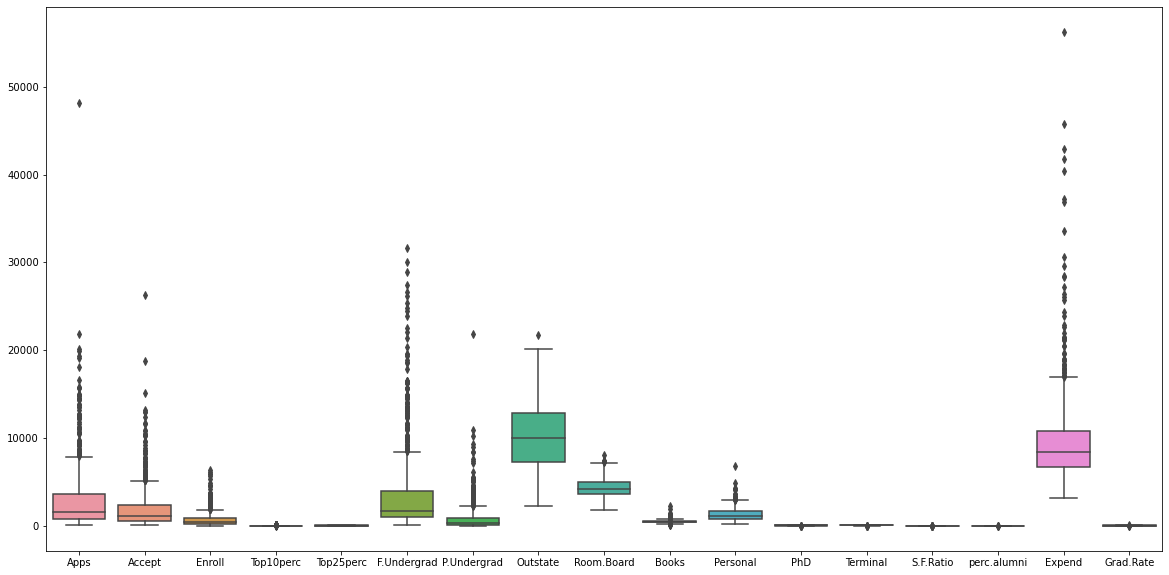

In [40]:
plt.figure(figsize=[20,10])
sns.boxplot(data=df3)

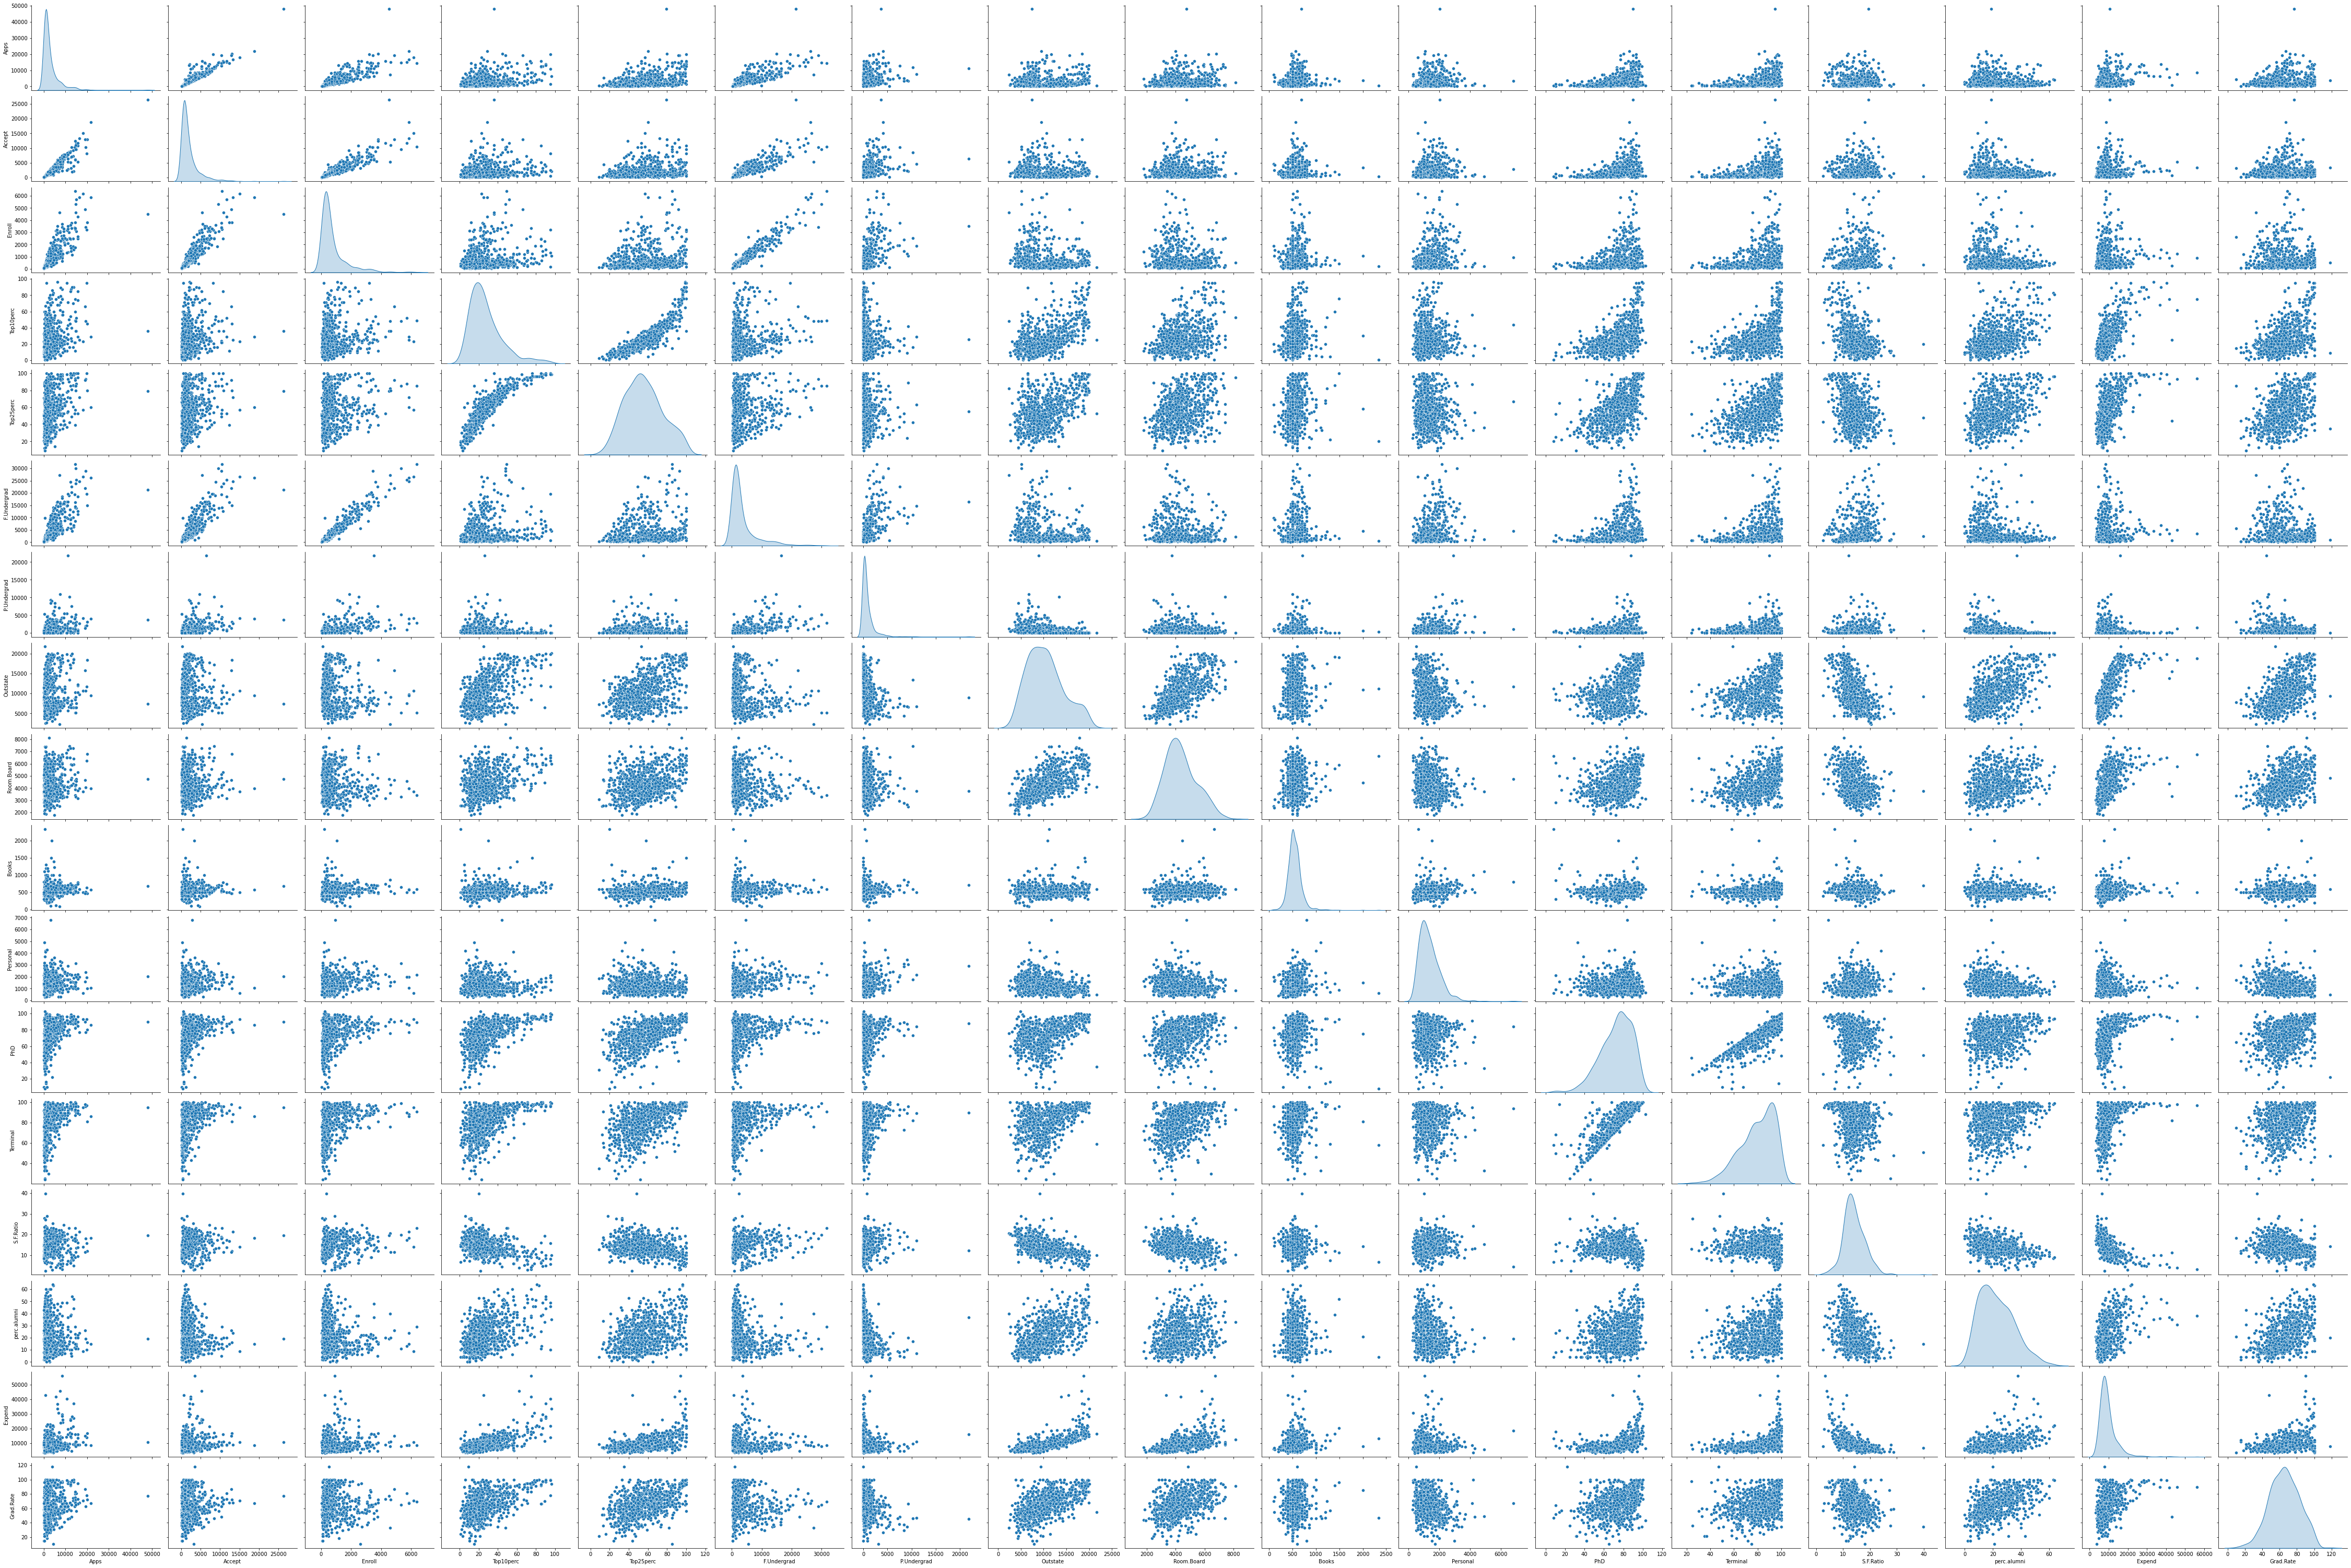

In [41]:
sns.pairplot(df3,diag_kind='kde',aspect=1.5);


In [42]:
df2_cor= df3.corr()
df2_cor.round(2)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.00    0.94    0.85       0.34       0.35         0.81   
Accept       0.94    1.00    0.91       0.19       0.25         0.87   
Enroll       0.85    0.91    1.00       0.18       0.23         0.96   
Top10perc    0.34    0.19    0.18       1.00       0.89         0.14   
Top25perc    0.35    0.25    0.23       0.89       1.00         0.20   
F.Undergrad  0.81    0.87    0.96       0.14       0.20         1.00   
P.Undergrad  0.40    0.44    0.51      -0.11      -0.05         0.57   
Outstate     0.05   -0.03   -0.16       0.56       0.49        -0.22   
Room.Board   0.16    0.09   -0.04       0.37       0.33        -0.07   
Books        0.13    0.11    0.11       0.12       0.12         0.12   
Personal     0.18    0.20    0.28      -0.09      -0.08         0.32   
PhD          0.39    0.36    0.33       0.53       0.55         0.32   
Terminal     0.37    0.34    0.31       0.49       0.52         0.30   
S.F.Ratio    0.10    0.18    0.24      -0.38      -0.29         0.28   
perc.alumni -0.09   -0.16   -0.18       0.46       0.42        -0.23   
Expend       0.26    0.12    0.06       0.66       0.53         0.02   
Grad.Rate    0.15    0.07   -0.02       0.49       0.48        -0.08   

             P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  \
Apps                0.40      0.05        0.16   0.13      0.18  0.39   
Accept              0.44     -0.03        0.09   0.11      0.20  0.36   
Enroll              0.51     -0.16       -0.04   0.11      0.28  0.33   
Top10perc          -0.11      0.56        0.37   0.12     -0.09  0.53   
Top25perc          -0.05      0.49        0.33   0.12     -0.08  0.55   
F.Undergrad         0.57     -0.22       -0.07   0.12      0.32  0.32   
P.Undergrad         1.00     -0.25       -0.06   0.08      0.32  0.15   
Outstate           -0.25      1.00        0.65   0.04     -0.30  0.38   
Room.Board         -0.06      0.65        1.00   0.13     -0.20  0.33   
Books               0.08      0.04        0.13   1.00      0.18  0.03   
Personal            0.32     -0.30       -0.20   0.18      1.00 -0.01   
PhD                 0.15      0.38        0.33   0.03     -0.01  1.00   
Terminal            0.14      0.41        0.37   0.10     -0.03  0.85   
S.F.Ratio           0.23     -0.55       -0.36  -0.03      0.14 -0.13   
perc.alumni        -0.28      0.57        0.27  -0.04     -0.29  0.25   
Expend             -0.08      0.67        0.50   0.11     -0.10  0.43   
Grad.Rate          -0.26      0.57        0.42   0.00     -0.27  0.31   

             Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Apps             0.37       0.10        -0.09    0.26       0.15  
Accept           0.34       0.18        -0.16    0.12       0.07  
Enroll           0.31       0.24        -0.18    0.06      -0.02  
Top10perc        0.49      -0.38         0.46    0.66       0.49  
Top25perc        0.52      -0.29         0.42    0.53       0.48  
F.Undergrad      0.30       0.28        -0.23    0.02      -0.08  
P.Undergrad      0.14       0.23        -0.28   -0.08      -0.26  
Outstate         0.41      -0.55         0.57    0.67       0.57  
Room.Board       0.37      -0.36         0.27    0.50       0.42  
Books            0.10      -0.03        -0.04    0.11       0.00  
Personal        -0.03       0.14        -0.29   -0.10      -0.27  
PhD              0.85      -0.13         0.25    0.43       0.31  
Terminal         1.00      -0.16         0.27    0.44       0.29  
S.F.Ratio       -0.16       1.00        -0.40   -0.58      -0.31  
perc.alumni      0.27      -0.40         1.00    0.42       0.49  
Expend           0.44      -0.58         0.42    1.00       0.39  
Grad.Rate        0.29      -0.31         0.49    0.39       1.00

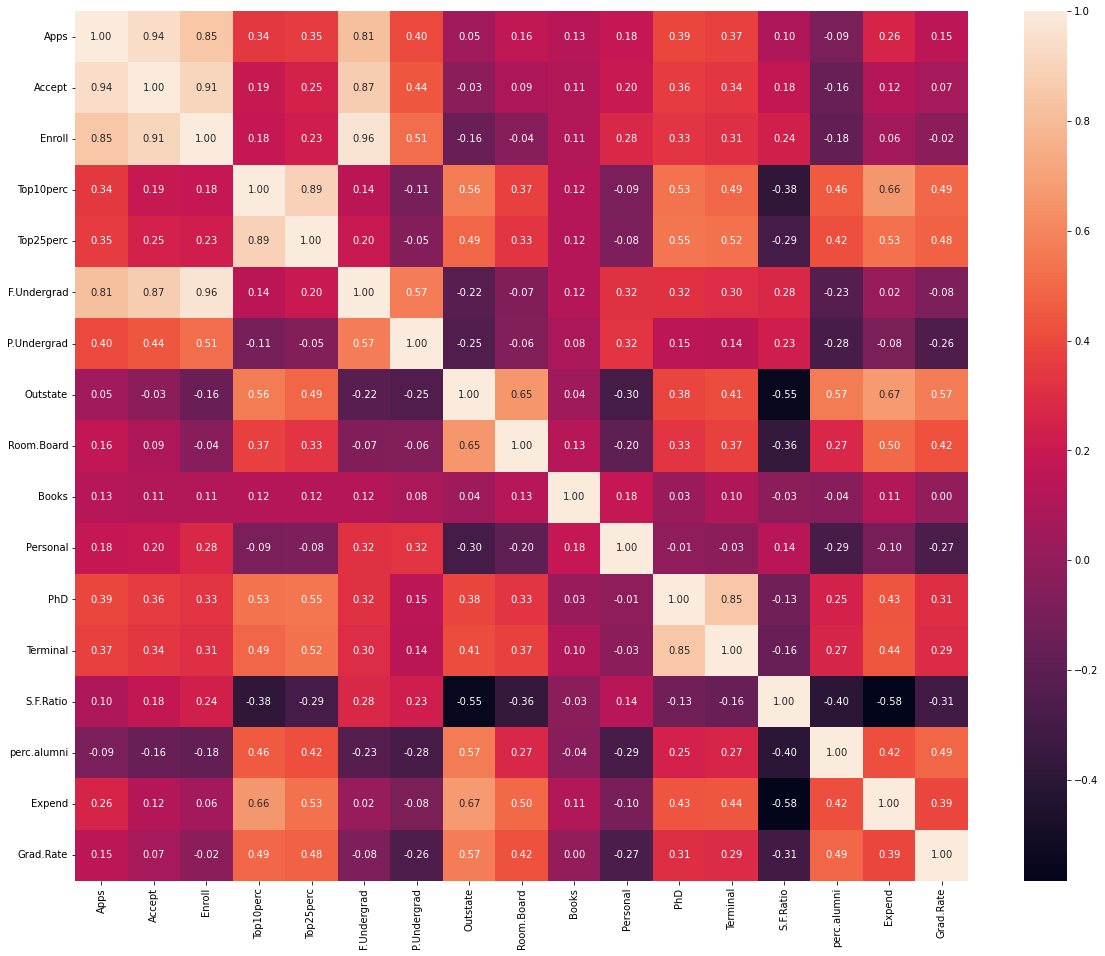

In [43]:
plt.figure(figsize=(20,16))
sns.heatmap(df2_cor, annot=True, fmt='.2f');

## 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

### Boxplot before Scaling Data.

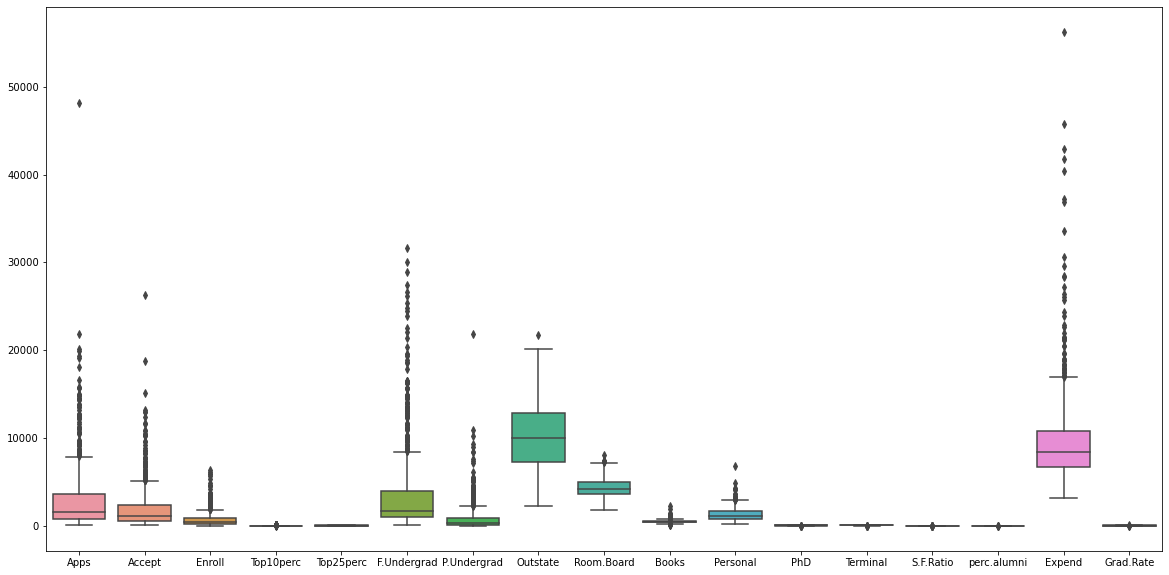

In [44]:
plt.figure(figsize=[20,10])
sns.boxplot(data=df3);

### Normalizing and scaling data without outliers treatment.

In [45]:
z_data=df3.apply(zscore)
z_data.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [46]:
z_data.describe().T

count          mean       std       min       25%       50%  \
Apps         777.0  6.355797e-17  1.000644 -0.755134 -0.575441 -0.373254   
Accept       777.0  6.774575e-17  1.000644 -0.794764 -0.577581 -0.371011   
Enroll       777.0 -5.249269e-17  1.000644 -0.802273 -0.579351 -0.372584   
Top10perc    777.0 -2.753232e-17  1.000644 -1.506526 -0.712380 -0.258583   
Top25perc    777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad  777.0 -1.661405e-16  1.000644 -0.734617 -0.558643 -0.411138   
P.Undergrad  777.0 -3.029180e-17  1.000644 -0.561502 -0.499719 -0.330144   
Outstate     777.0  6.515595e-17  1.000644 -2.014878 -0.776203 -0.112095   
Room.Board   777.0  3.570717e-16  1.000644 -2.351778 -0.693917 -0.143730   
Books        777.0 -2.192583e-16  1.000644 -2.747779 -0.481099 -0.299280   
Personal     777.0  4.765243e-17  1.000644 -1.611860 -0.725120 -0.207855   
PhD          777.0  5.954768e-17  1.000644 -3.962596 -0.653295  0.143389   
Terminal     777.0 -4.481615e-16  1.000644 -3.785982 -0.591502  0.156142   
S.F.Ratio    777.0 -2.057556e-17  1.000644 -2.929799 -0.654660 -0.123794   
perc.alumni  777.0 -6.022638e-17  1.000644 -1.836580 -0.786824 -0.140820   
Expend       777.0  1.213101e-16  1.000644 -1.240641 -0.557483 -0.245893   
Grad.Rate    777.0  3.886495e-16  1.000644 -3.230876 -0.726019 -0.026990   

                  75%        max  
Apps         0.160912  11.658671  
Accept       0.165417   9.924816  
Enroll       0.131413   6.043678  
Top10perc    0.422113   3.882319  
Top25perc    0.667104   2.233391  
F.Undergrad  0.062941   5.764674  
P.Undergrad  0.073418  13.789921  
Outstate     0.617927   2.800531  
Room.Board   0.631824   3.436593  
Books        0.306784  10.852297  
Personal     0.531095   8.068387  
PhD          0.756222   1.859323  
Terminal     0.835818   1.379560  
S.F.Ratio    0.609307   6.499390  
perc.alumni  0.666685   3.331452  
Expend       0.224174   8.924721  
Grad.Rate    0.730293   3.060392

#### We can see that mean value is 0 and standard deviation value is 1. Then we can use emperical rule which has +3 to-3 std area of curve which follows Normal distribution, Hence we can say is Normalized/Scaled. 

### Boxplot after scaling data.

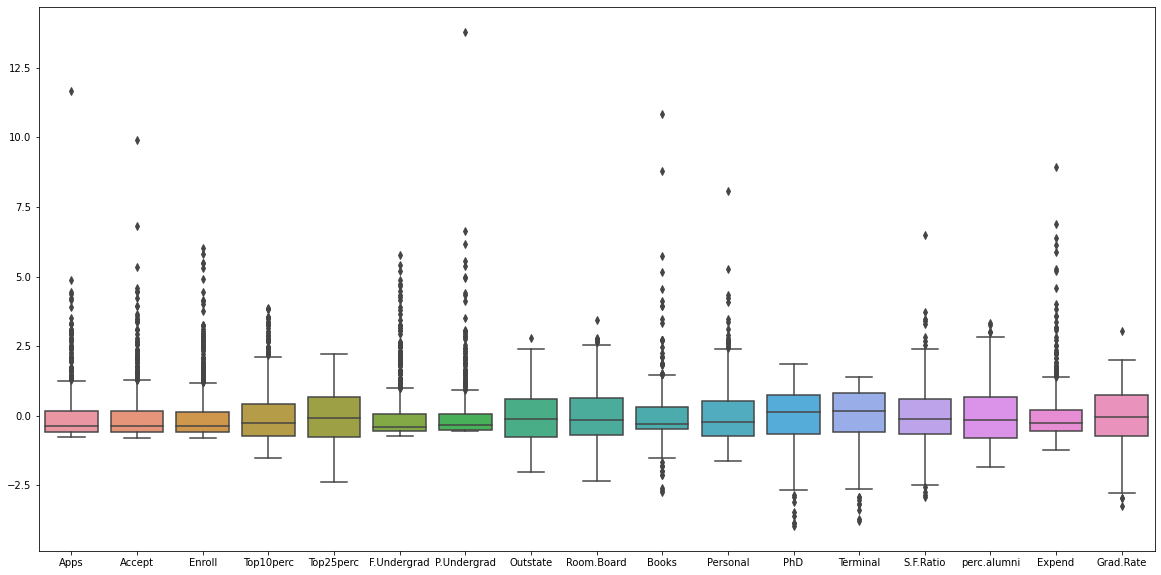

In [47]:
plt.figure(figsize=[20,10])
sns.boxplot(data=z_data);

### Min-Max Scaling.

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
M_Scaler = MinMaxScaler()

minmax_data = df3.copy()
coll = minmax_data.columns
for i in range(0,17):
    minmax_data[coll[i]]= M_Scaler.fit_transform(minmax_data[[coll[i]]])
minmax_data.head()    

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.032887  0.044177  0.107913   0.231579   0.472527     0.087164   
1  0.043842  0.070531  0.075035   0.157895   0.219780     0.080752   
2  0.028055  0.039036  0.047349   0.221053   0.450549     0.028473   
3  0.006998  0.010549  0.016045   0.621053   0.879121     0.011776   
4  0.002333  0.002818  0.003146   0.157895   0.384615     0.003492   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.024548  0.263430    0.239596  0.157754  0.297710  0.652632  0.710526   
1     0.056148  0.513430    0.736129  0.291444  0.190840  0.221053  0.078947   
2     0.004488  0.460227    0.310530  0.135472  0.139695  0.473684  0.552632   
3     0.002839  0.548554    0.578499  0.157754  0.095420  0.884211  0.960526   
4     0.039753  0.269628    0.368852  0.313725  0.190840  0.715789  0.631579   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   0.418231     0.187500  0.072671   0.462963  
1   0.260054     0.250000  0.138387   0.425926  
2   0.278820     0.468750  0.104605   0.407407  
3   0.139410     0.578125  0.298415   0.453704  
4   0.252011     0.031250  0.145833   0.046296

### Boxplot after Min-Max Scaled Data.

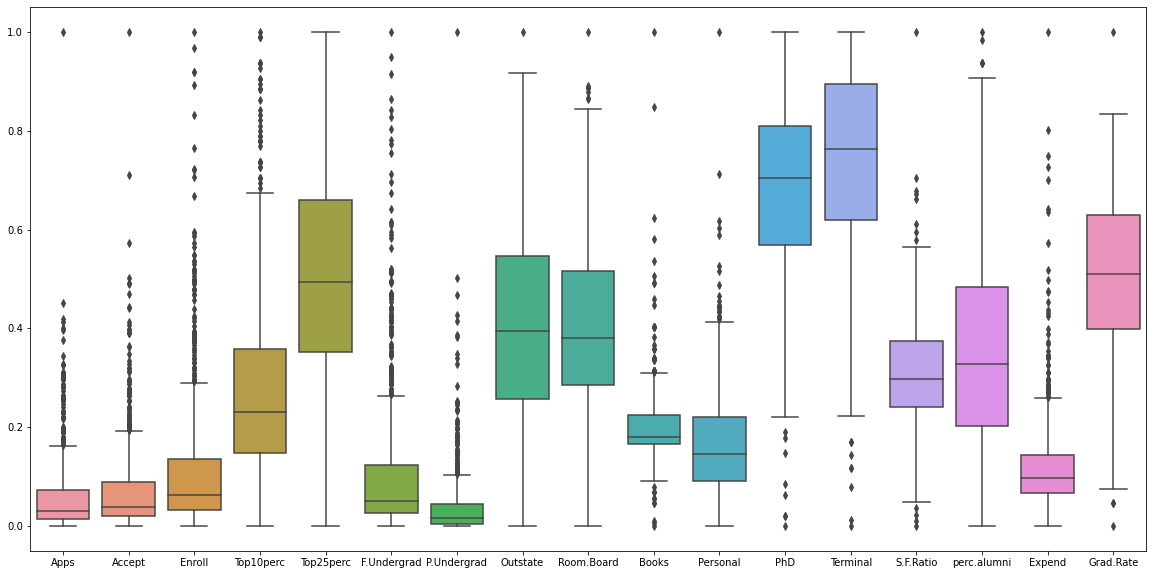

In [50]:
plt.figure(figsize=[20,10])
sns.boxplot(data=minmax_data);

## 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

* Statistical tests to be done before PCA.
* Bartletts Test of Sphericity: Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

H0: All variables in the data are uncorrelated.

Ha: At least one pair of variables in the data are correlated.
* If the Null hypothesis cannot be rejected, then PCA is not advisable.

* If the p-value is small, then we can reject the Null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence we do PCA.

In [51]:
! pip install factor_analyzer

In [52]:
from factor_analyzer import FactorAnalyzer

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [53]:
chi_square_value, p_value = calculate_bartlett_sphericity(z_data)
p_value

0.0

## KMO test

In [54]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(z_data)
kmo_model

0.8131251200373522

In [55]:
z_data.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [56]:
kmo_all

array([0.76987176, 0.74004745, 0.78180611, 0.75497456, 0.79091631,
       0.81409846, 0.9109631 , 0.84989446, 0.86258897, 0.65829417,
       0.89150515, 0.79345989, 0.78805389, 0.89748336, 0.91140023,
       0.85432115, 0.91779383])

## PCA

### Step 1: Standardising all 17 continous variables using z-score

In [57]:
Pca=df3.apply(zscore)
Pca.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

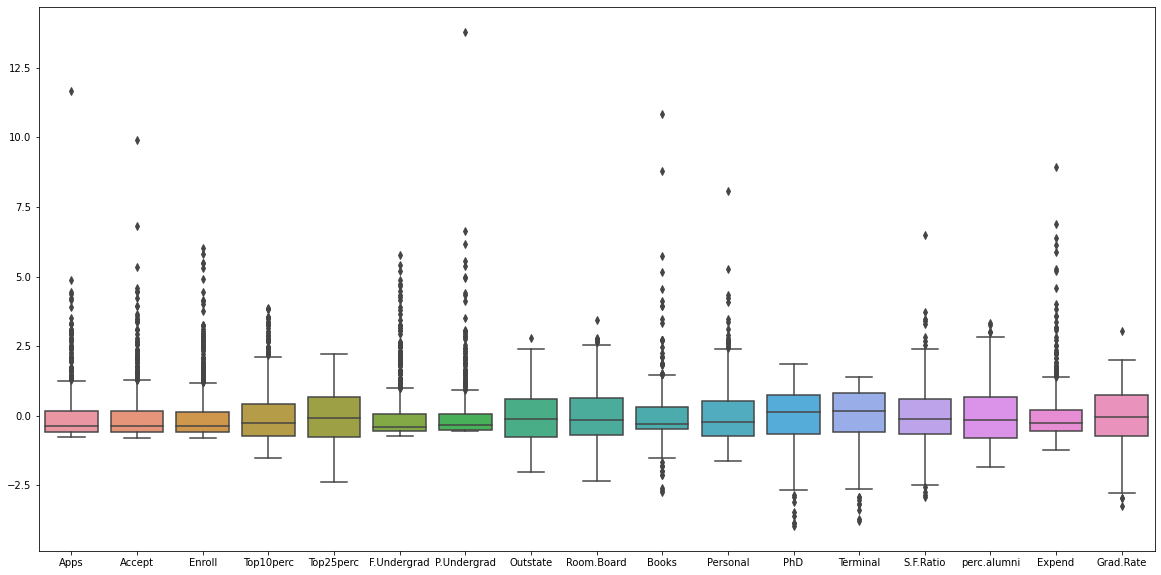

In [58]:
plt.figure(figsize=[20,10])
sns.boxplot(data=Pca);

* By using z-score data has been standardised.In the boxplot we can see that the data on all the dimensions are subtracted from their mean to shift the data points to origin.

### Step 2: Generate the Covariance matrix/Correlation matrix

In [59]:
Edu_cov = Pca.cov()
Edu_cov

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.001289  0.944666  0.847913   0.339270   0.352093     0.815540   
Accept       0.944666  1.001289  0.912811   0.192695   0.247795     0.875350   
Enroll       0.847913  0.912811  1.001289   0.181527   0.227037     0.965883   
Top10perc    0.339270  0.192695  0.181527   1.001289   0.893144     0.141471   
Top25perc    0.352093  0.247795  0.227037   0.893144   1.001289     0.199702   
F.Undergrad  0.815540  0.875350  0.965883   0.141471   0.199702     1.001289   
P.Undergrad  0.398777  0.441839  0.513730  -0.105492  -0.053646     0.571247   
Outstate     0.050224 -0.025788 -0.155678   0.563055   0.490024    -0.216020   
Room.Board   0.165152  0.091016 -0.040284   0.371959   0.331917    -0.068979   
Books        0.132729  0.113672  0.112856   0.119012   0.115676     0.115699   
Personal     0.178961  0.201248  0.281291  -0.093437  -0.080914     0.317608   
PhD          0.391201  0.356216  0.331896   0.532513   0.546566     0.318747   
Terminal     0.369968  0.338018  0.308671   0.491768   0.525425     0.300406   
S.F.Ratio    0.095756  0.176456  0.237577  -0.385370  -0.295009     0.280064   
perc.alumni -0.090342 -0.160196 -0.181027   0.456072   0.418403    -0.229758   
Expend       0.259927  0.124878  0.064252   0.661765   0.528127     0.018676   
Grad.Rate    0.146944  0.067399 -0.022370   0.495627   0.477896    -0.078875   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398777  0.050224    0.165152  0.132729  0.178961  0.391201   
Accept          0.441839 -0.025788    0.091016  0.113672  0.201248  0.356216   
Enroll          0.513730 -0.155678   -0.040284  0.112856  0.281291  0.331896   
Top10perc      -0.105492  0.563055    0.371959  0.119012 -0.093437  0.532513   
Top25perc      -0.053646  0.490024    0.331917  0.115676 -0.080914  0.546566   
F.Undergrad     0.571247 -0.216020   -0.068979  0.115699  0.317608  0.318747   
P.Undergrad     1.001289 -0.253839   -0.061405  0.081304  0.320294  0.149306   
Outstate       -0.253839  1.001289    0.655100  0.038905 -0.299472  0.383476   
Room.Board     -0.061405  0.655100    1.001289  0.128128 -0.199685  0.329627   
Books           0.081304  0.038905    0.128128  1.001289  0.179526  0.026940   
Personal        0.320294 -0.299472   -0.199685  0.179526  1.001289 -0.010950   
PhD             0.149306  0.383476    0.329627  0.026940 -0.010950  1.001289   
Terminal        0.142086  0.408509    0.375022  0.100084 -0.030653  0.850682   
S.F.Ratio       0.232830 -0.555536   -0.363095 -0.031970  0.136521 -0.130698   
perc.alumni    -0.281154  0.566992    0.272714 -0.040260 -0.286337  0.249330   
Expend         -0.083676  0.673646    0.502386  0.112554 -0.098018  0.433319   
Grad.Rate      -0.257332  0.572026    0.425489  0.001062 -0.269691  0.305431   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369968   0.095756    -0.090342  0.259927   0.146944  
Accept       0.338018   0.176456    -0.160196  0.124878   0.067399  
Enroll       0.308671   0.237577    -0.181027  0.064252  -0.022370  
Top10perc    0.491768  -0.385370     0.456072  0.661765   0.495627  
Top25perc    0.525425  -0.295009     0.418403  0.528127   0.477896  
F.Undergrad  0.300406   0.280064    -0.229758  0.018676  -0.078875  
P.Undergrad  0.142086   0.232830    -0.281154 -0.083676  -0.257332  
Outstate     0.408509  -0.555536     0.566992  0.673646   0.572026  
Room.Board   0.375022  -0.363095     0.272714  0.502386   0.425489  
Books        0.100084  -0.031970    -0.040260  0.112554   0.001062  
Personal    -0.030653   0.136521    -0.286337 -0.098018  -0.269691  
PhD          0.850682  -0.130698     0.249330  0.433319   0.305431  
Terminal     1.001289  -0.160310     0.267475  0.439365   0.289900  
S.F.Ratio   -0.160310   1.001289    -0.403448 -0.584584  -0.307106  
perc.alumni  0.267475  -0.403448     1.001289  0.418250   0.491530  
Expend       0.439365  -0.58458

### Covariance matrix before scaling.

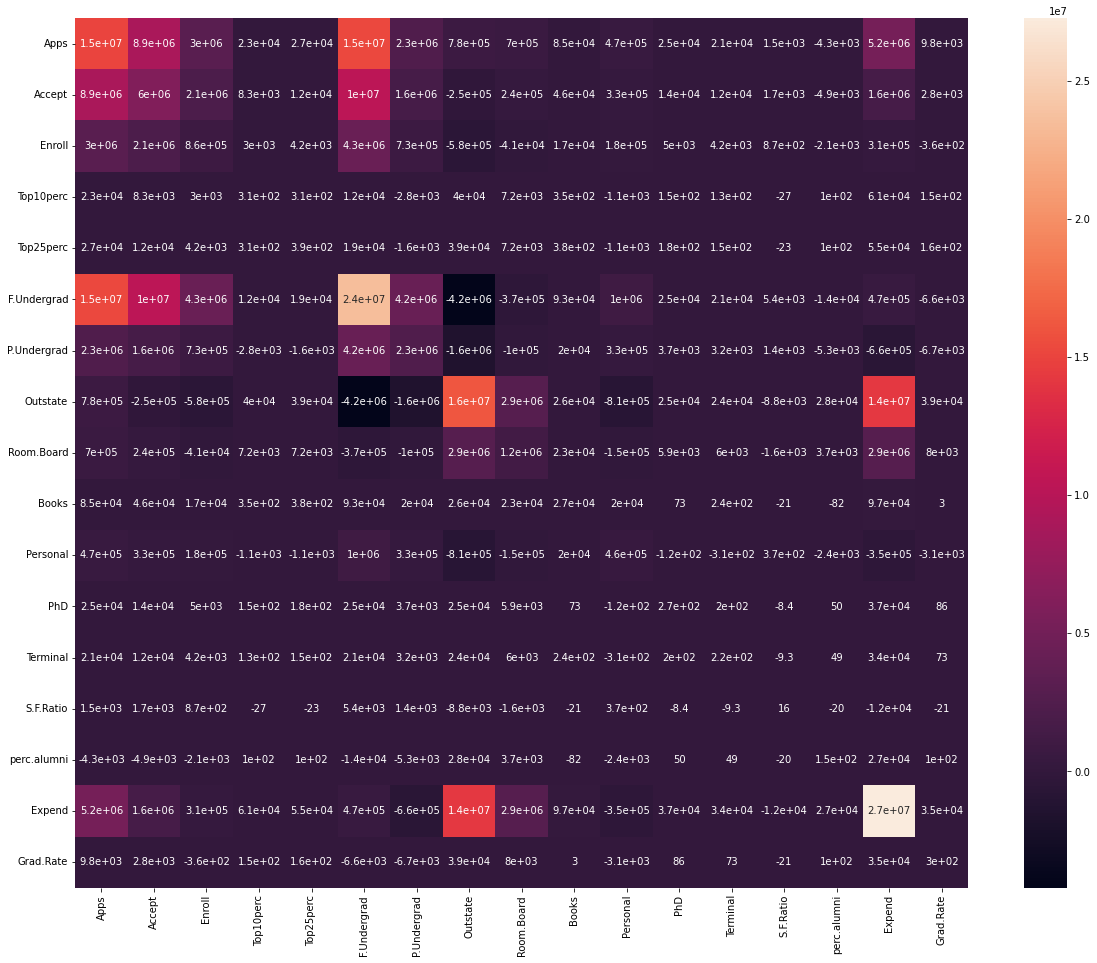

In [60]:
plt.figure(figsize=(20,16))
sns.heatmap(df3.cov(), annot=True);

### Covariance matrix before scaling.

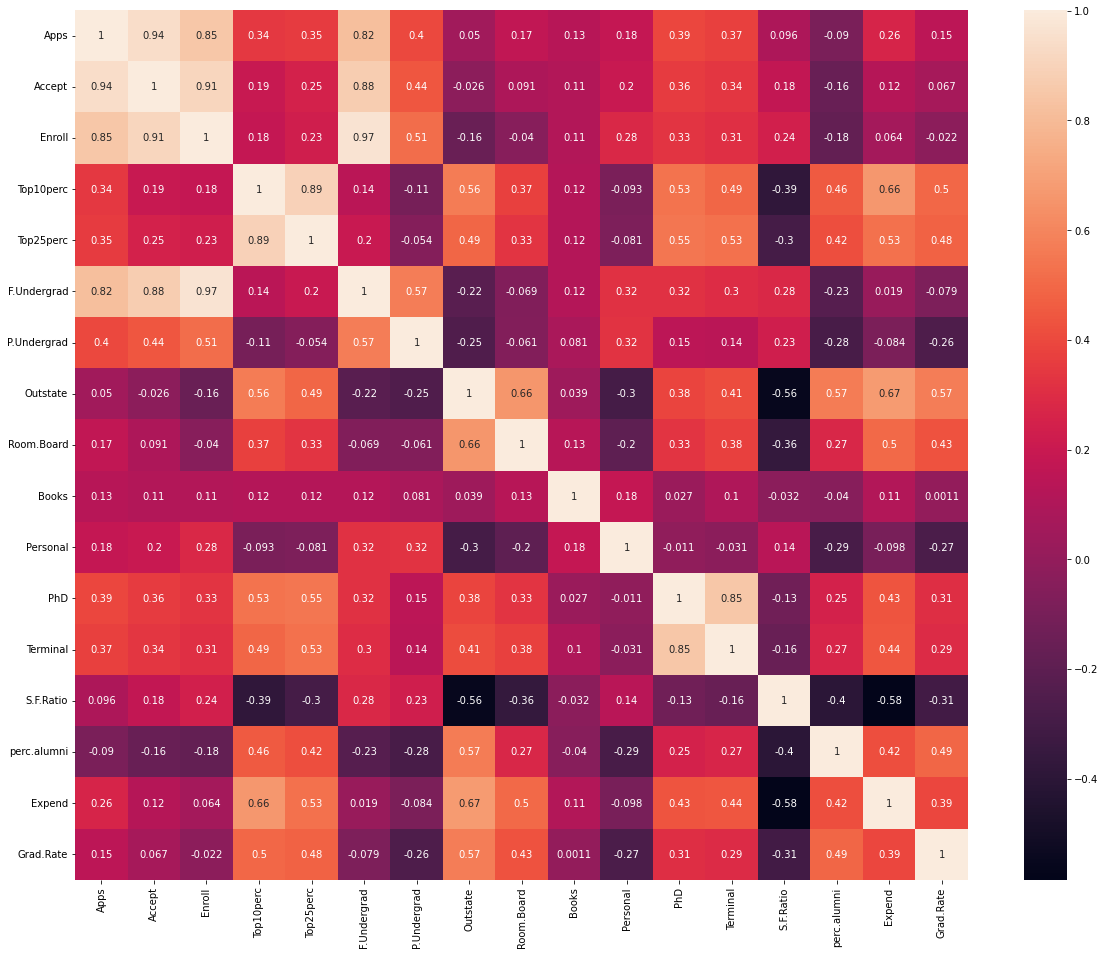

In [61]:
plt.figure(figsize=(20,16))
sns.heatmap(Edu_cov, annot=True);

### Correlation Matrix.

In [62]:
Edu_cor = Pca.corr()
Edu_cor

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

### Correlation matrix after scaling.

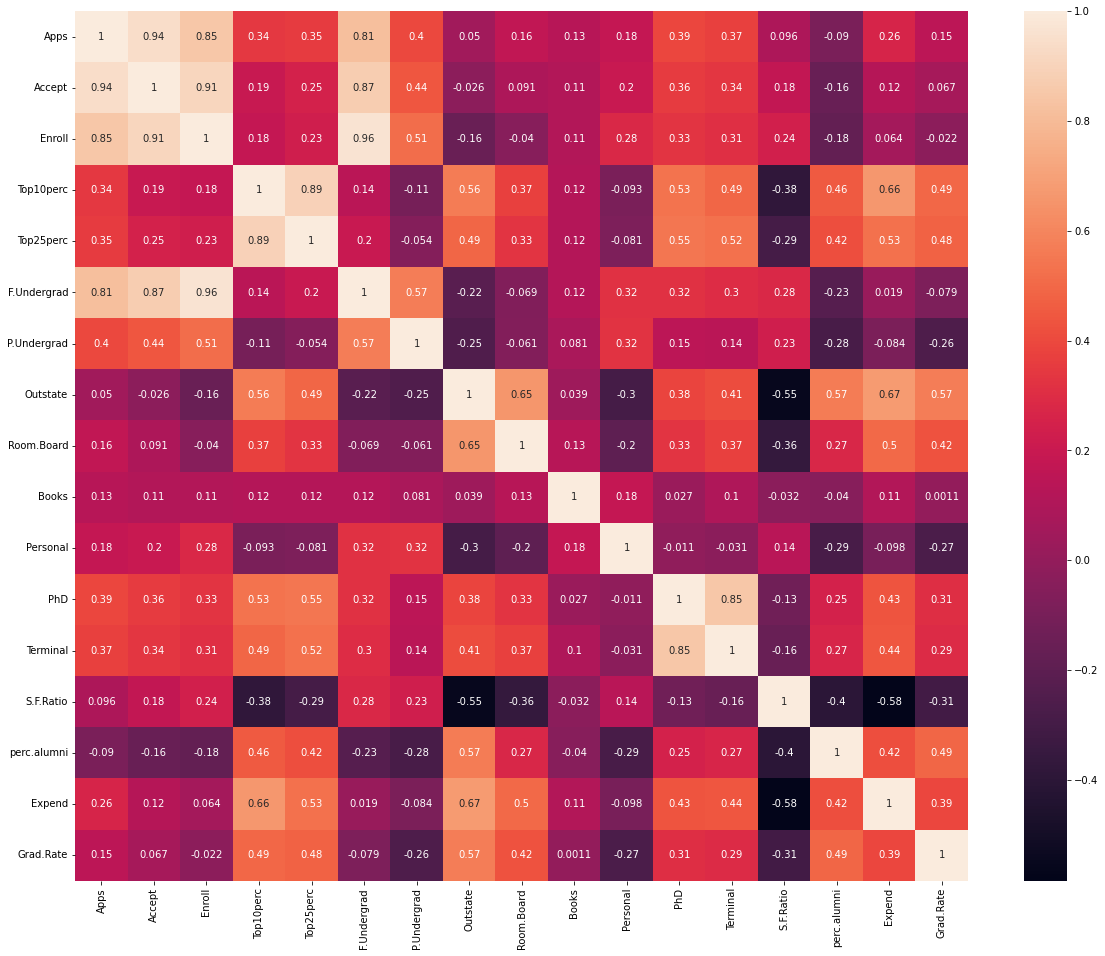

In [63]:
plt.figure(figsize=(20,16))
sns.heatmap(Edu_cor, annot=True);

## 2.3 Comment on the comparison between the covariance and the correlation matrices from this data

* Hence from the above heatmap we can say that the covariance and correlation matrix of standardised variables are equal to each other.

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca =PCA(n_components=17, random_state=123)
pca_score = pca.fit_transform(z_data)
pca_score

array([[-1.59285540e+00,  7.67333510e-01, -1.01073537e-01, ...,
         1.75239502e-03, -9.31400698e-02,  9.35522023e-02],
       [-2.19240180e+00, -5.78829984e-01,  2.27879812e+00, ...,
         1.03709803e-01, -5.02556890e-02, -1.74057054e-01],
       [-1.43096371e+00, -1.09281889e+00, -4.38092811e-01, ...,
        -2.25582869e-02, -4.05268301e-03,  3.75875882e-03],
       ...,
       [-7.32560596e-01, -7.72352397e-02, -4.05641899e-04, ...,
         6.79013123e-02, -2.32023970e-01, -9.99380421e-02],
       [ 7.91932735e+00, -2.06832886e+00,  2.07356368e+00, ...,
         3.53597440e-01,  3.04416200e-01,  3.35104811e-01],
       [-4.69508066e-01,  3.66660943e-01, -1.32891515e+00, ...,
        -1.14873492e-01, -1.17076127e-01, -2.57218339e-03]])

In [66]:
components=pca.components_
components

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [67]:
z_data.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [68]:
components[0].round(2)

array([ 0.25,  0.21,  0.18,  0.35,  0.34,  0.15,  0.03,  0.29,  0.25,
        0.06, -0.04,  0.32,  0.32, -0.18,  0.21,  0.32,  0.25])

## 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [69]:
0.25*-0.346882+0.21*-0.321205+0.18*-0.063509+0.35*-0.258583+0.34*-0.191827+0.15*-0.168116+0.03*-0.209207+0.29*-0.746356 + 0.25*-0.964905 + 0.06*-0.602312 + (-0.04*1.270045) + 0.32*-0.163028 + 0.32*-0.115729 + (-0.18*1.013776) + 0.21*-0.867574 + 0.32*-0.50191 + 0.25*-0.318252

-1.5914806799999999

In [70]:
0.2487656 *-0.346882 + 0.2076015*-0.321205 + 0.17630359*-0.063509 + 0.35427395*-0.258583 + 0.34400128*-0.191827 + 0.15464096*-0.168116 + 0.0264425 *-0.209207 + 0.29473642*-0.746356 + 0.24903045*-0.964905 + 0.06475752*-0.602312 + (-0.04252854*1.270045) + 0.31831287*-0.163028 + 0.31705602*-0.115729 + (-0.17695789*1.013776) + 0.20508237*-0.867574 + 0.31890875*-0.50191 + 0.25231565*-0.318252 

-1.5928554878858499

In [71]:
pca_score[0]

array([-1.5928554 ,  0.76733351, -0.10107354, -0.9217494 , -0.7439754 ,
       -0.29830608,  0.63844347, -0.87938614,  0.09308394,  0.04859275,
        0.39974719, -0.08968973, -0.05209845,  0.18013969,  0.0017524 ,
       -0.09314007,  0.0935522 ])

## 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [72]:
Eg_values = pca.explained_variance_
print('Eigen values are -\n',Eg_values)

Eigen values are -
 [5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.31344588 0.22061096
 0.16779415 0.1439785  0.08802464 0.03672545 0.02302787]


In [73]:
Eg_vectors = pca.components_
print('Eigen vectors are -\n',Eg_vectors)

Eigen vectors are -
 [[ 2.48765602e-01  2.07601502e-01  1.76303592e-01  3.54273947e-01
   3.44001279e-01  1.54640962e-01  2.64425045e-02  2.94736419e-01
   2.49030449e-01  6.47575181e-02 -4.25285386e-02  3.18312875e-01
   3.17056016e-01 -1.76957895e-01  2.05082369e-01  3.18908750e-01
   2.52315654e-01]
 [ 3.31598227e-01  3.72116750e-01  4.03724252e-01 -8.24118211e-02
  -4.47786551e-02  4.17673774e-01  3.15087830e-01 -2.49643522e-01
  -1.37808883e-01  5.63418434e-02  2.19929218e-01  5.83113174e-02
   4.64294477e-02  2.46665277e-01 -2.46595274e-01 -1.31689865e-01
  -1.69240532e-01]
 [-6.30921033e-02 -1.01249056e-01 -8.29855709e-02  3.50555339e-02
  -2.41479376e-02 -6.13929764e-02  1.39681716e-01  4.65988731e-02
   1.48967389e-01  6.77411649e-01  4.99721120e-01 -1.27028371e-01
  -6.60375454e-02 -2.89848401e-01 -1.46989274e-01  2.26743985e-01
  -2.08064649e-01]
 [ 2.81310530e-01  2.67817346e-01  1.61826771e-01 -5.15472524e-02
  -1.09766541e-01  1.00412335e-01 -1.58558487e-01  1.31291364e-0

## 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [74]:
5.45052162/sum(pca.explained_variance_) # Variance for the first component.

0.3202062818623665

In [75]:
var_exp_ratio = pca.explained_variance_ratio_
print('Explained variance ratio is -\n')
print(var_exp_ratio)

Explained variance ratio is -

[0.32020628 0.26340214 0.06900917 0.05922989 0.05488405 0.04984701
 0.03558871 0.03453621 0.03117234 0.02375192 0.01841426 0.01296041
 0.00985754 0.00845842 0.00517126 0.00215754 0.00135284]


#### Cummulative explained variance ratio:

In [76]:
cum_exp_ratio = np.cumsum(var_exp_ratio)
print('Cummulative explained variance ratio is -\n')
print(cum_exp_ratio)

Cummulative explained variance ratio is -

[0.32020628 0.58360843 0.65261759 0.71184748 0.76673154 0.81657854
 0.85216726 0.88670347 0.91787581 0.94162773 0.96004199 0.9730024
 0.98285994 0.99131837 0.99648962 0.99864716 1.        ]


In [77]:
cum_exp_ratio*100

array([ 32.0206282 ,  58.36084263,  65.26175919,  71.18474841,
        76.67315352,  81.65785448,  85.21672597,  88.67034731,
        91.78758099,  94.16277251,  96.00419883,  97.30024023,
        98.28599436,  99.13183669,  99.64896227,  99.86471628,
       100.        ])

* Cummulative variance of all above 17 components is 1.
* That is all 17 components ars showing 100% variance in data.

## Scree Plot

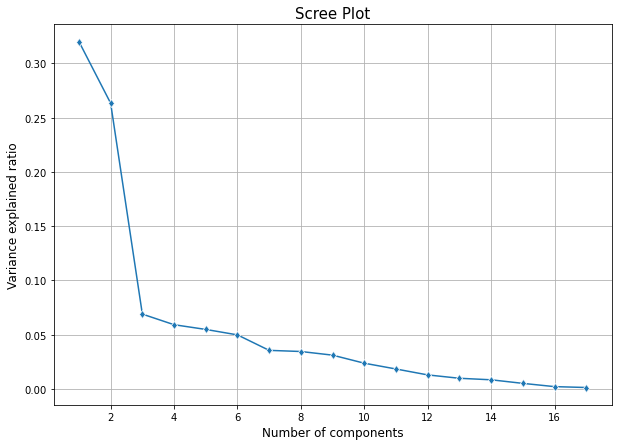

In [78]:
plt.figure(figsize=(10,7))
sns.lineplot(y=var_exp_ratio, x=range(1,len(var_exp_ratio)+1),marker='d')
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Variance explained ratio',fontsize=12)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

### Cummulative Plot.

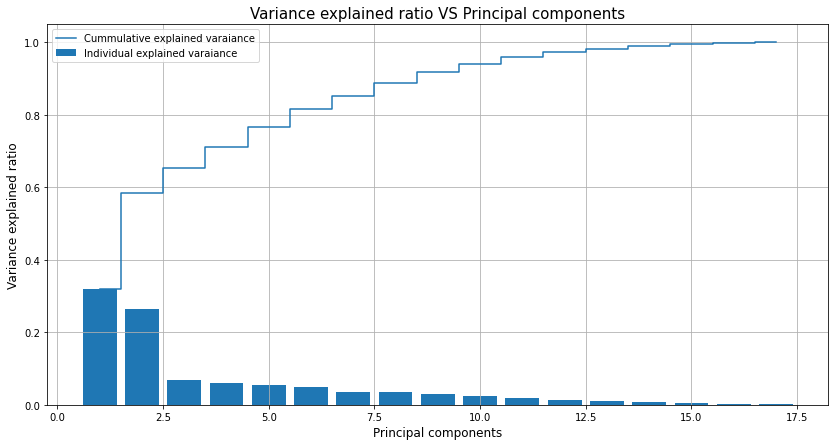

In [79]:
plt.figure(figsize=(14,7))
plt.bar(range(1,len(var_exp_ratio)+1), var_exp_ratio, alpha=1, align='center', label='Individual explained varaiance')
plt.step(range(1,len(var_exp_ratio)+1), cum_exp_ratio, alpha=1, where='mid', label='Cummulative explained varaiance')
plt.xlabel('Principal components',fontsize=12)
plt.ylabel('Variance explained ratio',fontsize=12)
plt.title('Variance explained ratio VS Principal components',fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()

In [80]:
pca_1= PCA(n_components=6,random_state=123)
reduced_data =pca_1.fit_transform(z_data)
reduced_data

array([[-1.59285540e+00,  7.67333510e-01, -1.01073616e-01,
        -9.21749291e-01, -7.43975435e-01, -2.98306092e-01],
       [-2.19240180e+00, -5.78829984e-01,  2.27879810e+00,
         3.58891825e+00,  1.05999660e+00, -1.77137311e-01],
       [-1.43096371e+00, -1.09281889e+00, -4.38092815e-01,
         6.77240533e-01, -3.69613276e-01, -9.60591689e-01],
       ...,
       [-7.32560596e-01, -7.72352401e-02, -4.05798710e-04,
         5.43164956e-02, -5.16021192e-01,  4.68014225e-01],
       [ 7.91932735e+00, -2.06832886e+00,  2.07356387e+00,
         8.52053749e-01, -9.47754660e-01, -2.06993735e+00],
       [-4.69508066e-01,  3.66660943e-01, -1.32891523e+00,
        -1.08022442e-01, -1.13217598e+00,  8.39893075e-01]])

In [81]:
pca_load = pd.DataFrame(pca_1.components_, columns = list(z_data))
pca_load.shape

(6, 17)

In [82]:
pca_load.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161189     0.017314  0.079273   0.269129  
4  -0.079388    -0.216297  0.075958  -0.109268

In [83]:
from matplotlib.patches import Rectangle

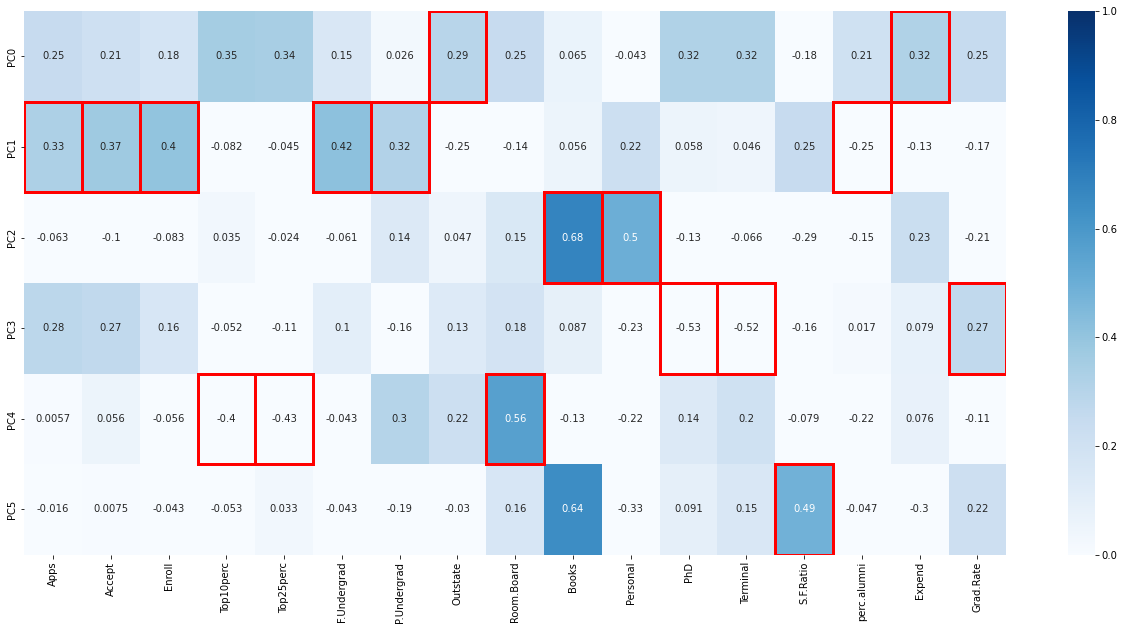

In [84]:
fig,ax = plt.subplots(figsize=(22,10), facecolor='w',edgecolor='k')
ax=sns.heatmap(pca_load, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar='False', fmt='.2g', ax=ax, yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5'])
column_max = pca_load.abs().idxmax(axis=0)
for col, variable in enumerate(pca_load.columns):
    position =pca_load.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [85]:
Edu_pca = pd.DataFrame(reduced_data, columns=['PC0','PC1','PC2','PC3','PC4','PC5'])
Edu_pca.head()

PC0       PC1       PC2       PC3       PC4       PC5
0 -1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306
1 -2.192402 -0.578830  2.278798  3.588918  1.059997 -0.177137
2 -1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592
3  2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059508
4 -2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918

In [86]:
Edu_pca.shape

(777, 6)

In [87]:
Edu_new =pd.concat([df2["Names"],Edu_pca], axis=1)
Edu_new

Names       PC0       PC1       PC2       PC3  \
0      Abilene Christian University -1.592855  0.767334 -0.101074 -0.921749   
1                Adelphi University -2.192402 -0.578830  2.278798  3.588918   
2                    Adrian College -1.430964 -1.092819 -0.438093  0.677241   
3               Agnes Scott College  2.855557 -2.630612  0.141722 -1.295486   
4         Alaska Pacific University -2.212008  0.021631  2.387030 -1.114538   
..                              ...       ...       ...       ...       ...   
772         Worcester State College -3.328458  1.220255 -0.383388  0.108555   
773               Xavier University  0.199389 -0.686689  0.051563  0.562269   
774  Xavier University of Louisiana -0.732561 -0.077235 -0.000406  0.054316   
775                 Yale University  7.919327 -2.068329  2.073564  0.852054   
776    York College of Pennsylvania -0.469508  0.366661 -1.328915 -0.108022   

          PC4       PC5  
0   -0.743975 -0.298306  
1    1.059997 -0.177137  
2   -0.369613 -0.960592  
3   -0.183837 -1.059508  
4    0.684451  0.004918  
..        ...       ...  
772  0.776996  0.309429  
773  0.375191  0.373343  
774 -0.516021  0.468014  
775 -0.947755 -2.069937  
776 -1.132176  0.839893  

[777 rows x 7 columns]

In [88]:
Edu_new.head()

Names       PC0       PC1       PC2       PC3  \
0  Abilene Christian University -1.592855  0.767334 -0.101074 -0.921749   
1            Adelphi University -2.192402 -0.578830  2.278798  3.588918   
2                Adrian College -1.430964 -1.092819 -0.438093  0.677241   
3           Agnes Scott College  2.855557 -2.630612  0.141722 -1.295486   
4     Alaska Pacific University -2.212008  0.021631  2.387030 -1.114538   

        PC4       PC5  
0 -0.743975 -0.298306  
1  1.059997 -0.177137  
2 -0.369613 -0.960592  
3 -0.183837 -1.059508  
4  0.684451  0.004918

In [89]:
corr1 = Edu_new.corr()
corr1

PC0           PC1           PC2           PC3           PC4  \
PC0  1.000000e+00  2.363768e-17 -9.216363e-18  1.861464e-18  5.832975e-18   
PC1  2.363768e-17  1.000000e+00  8.556371e-17 -5.660897e-18  1.677717e-17   
PC2 -9.216363e-18  8.556371e-17  1.000000e+00  4.042607e-18  1.565123e-16   
PC3  1.861464e-18 -5.660897e-18  4.042607e-18  1.000000e+00 -4.344739e-16   
PC4  5.832975e-18  1.677717e-17  1.565123e-16 -4.344739e-16  1.000000e+00   
PC5 -1.663205e-18 -7.995352e-17  5.296626e-16 -3.165644e-16 -1.574794e-17   

              PC5  
PC0 -1.663205e-18  
PC1 -7.995352e-17  
PC2  5.296626e-16  
PC3 -3.165644e-16  
PC4 -1.574794e-17  
PC5  1.000000e+00

<AxesSubplot:>

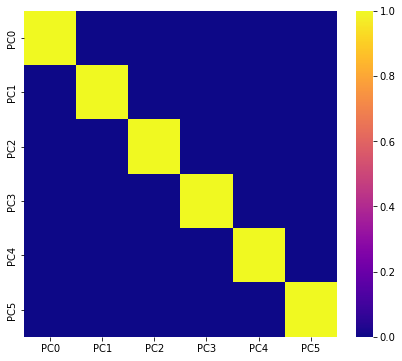

In [90]:
plt.figure(figsize=(7,6))
sns.heatmap(corr1, cmap='plasma')